Baseline vs Tuned Comparison:
              Accuracy_Baseline  Accuracy_Tuned  Macro_F1_Baseline  \
Model                                                                
CatBoost                 0.6133          0.5450             0.4207   
ExtraTrees               0.5467          0.4850             0.4763   
LightGBM                 0.5183          0.5300             0.4627   
RandomForest             0.5883          0.5233             0.4594   
XGBoost                  0.5983          0.5300             0.4482   

              Macro_F1_Tuned  Macro_Recall_Baseline  Macro_Recall_Tuned  
Model                                                                    
CatBoost              0.5270                 0.4860              0.5308  
ExtraTrees            0.4800                 0.4805              0.4800  
LightGBM              0.5104                 0.4639              0.5152  
RandomForest          0.5168                 0.4870              0.5168  
XGBoost               0.5296       

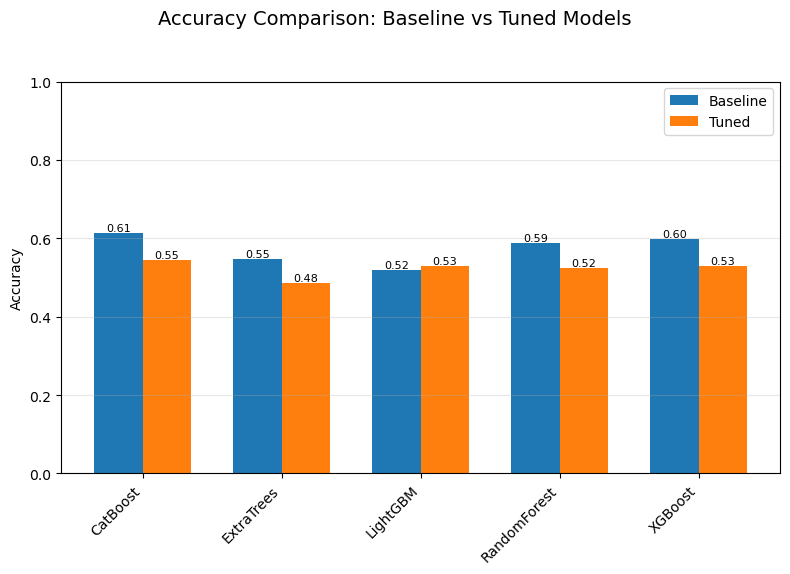

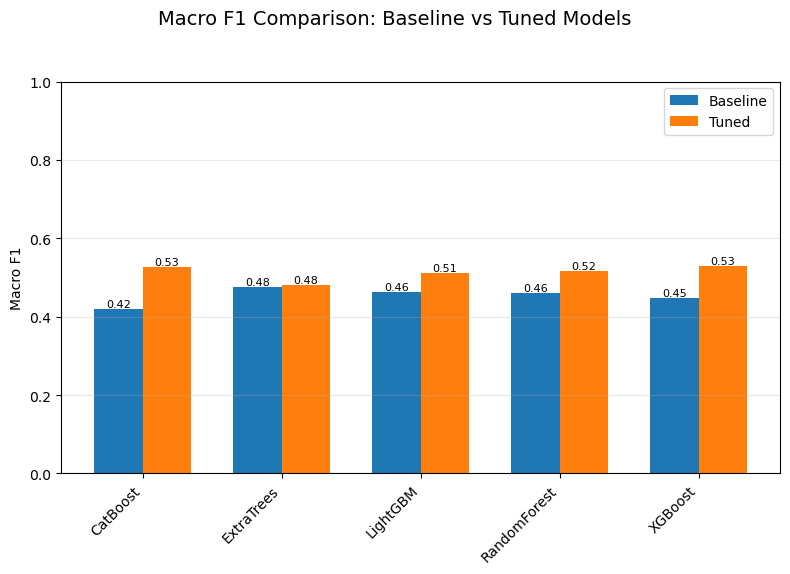

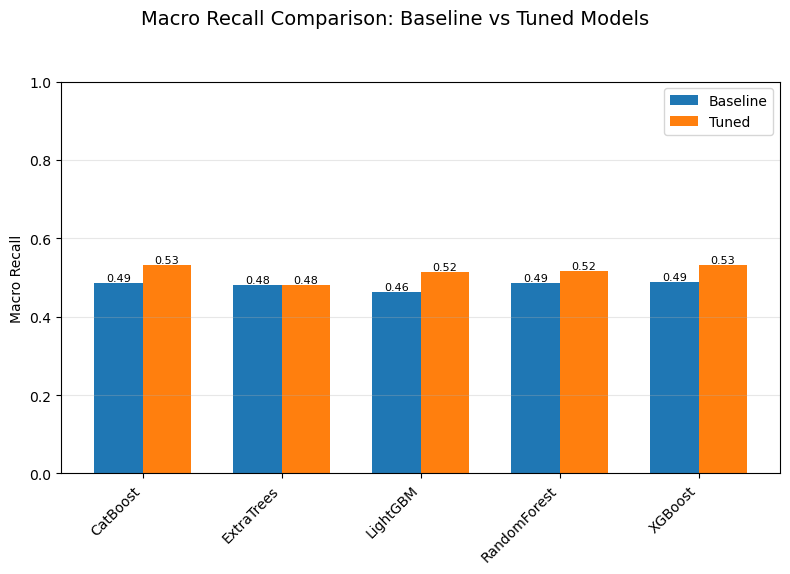

In [1]:
# Step5_baseline_vs_tuned_binary_full_fixed.py

import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Base directory (updated)
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML_Final_Project"
PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")

baseline_file = os.path.join(PROCESSED_PATH, "model_results_step3_binary.csv")
tuned_file    = os.path.join(PROCESSED_PATH, "step4_binary_prob_tuned.csv")

# ---------------------------
# Load results
# ---------------------------
df_base = pd.read_csv(baseline_file)
df_tuned = pd.read_csv(tuned_file)

# Ensure "Model" is index
if "Model" in df_base.columns:
    df_base.set_index("Model", inplace=True)
if "Model" in df_tuned.columns:
    df_tuned.set_index("Model", inplace=True)

# Normalize index names
df_base.index = df_base.index.astype(str).str.strip().str.lower()
df_tuned.index = df_tuned.index.astype(str).str.strip().str.lower()

# Map common names
name_map = {
    "randomforest": "RandomForest",
    "randomforestclassifier": "RandomForest",
    "extratrees": "ExtraTrees",
    "extratreesclassifier": "ExtraTrees",
    "xgboost": "XGBoost",
    "xgbclassifier": "XGBoost",
    "lightgbm": "LightGBM",
    "lgbmclassifier": "LightGBM",
    "catboost": "CatBoost",
    "catboostclassifier": "CatBoost"
}
df_base.rename(index=name_map, inplace=True)
df_tuned.rename(index=name_map, inplace=True)

# Keep only common models
common_models = sorted(set(df_base.index) & set(df_tuned.index))
if not common_models:
    print("⚠️ No common models found. Check CSVs.")
else:
    df_base = df_base.loc[common_models]
    df_tuned = df_tuned.loc[common_models]

    # Merge for comparison
    comp_df = df_base.add_suffix("_Baseline").join(df_tuned.add_suffix("_Tuned"))
    cols_keep = [c for c in [
        "Accuracy_Baseline", "Accuracy_Tuned",
        "Macro_F1_Baseline", "Macro_F1_Tuned",
        "Macro_Recall_Baseline", "Macro_Recall_Tuned"
    ] if c in comp_df.columns]
    comp_df = comp_df[cols_keep].round(4)

    print("Baseline vs Tuned Comparison:")
    print(comp_df)

    # Save comparison CSV
    comp_df.to_csv(os.path.join(PROCESSED_PATH, "baseline_vs_tuned_step5.csv"))

    # ---------------------------
    # Function to add value labels
    # ---------------------------
    def add_labels(ax, bars):
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h,
                    f"{h:.2f}", ha='center', va='bottom', fontsize=8)

    metrics = [("Accuracy", "Accuracy"),
               ("Macro_F1", "Macro F1"),
               ("Macro_Recall", "Macro Recall")]

    labels = common_models
    x = range(len(common_models))
    width = 0.35

    # ---------------------------
    # Plot each metric with fixed 0–1 y-axis
    # ---------------------------
    for metric_key, metric_label in metrics:
        if metric_key not in df_base.columns or metric_key not in df_tuned.columns:
            continue

        fig, ax = plt.subplots(figsize=(8, 6))
        fig.suptitle(f"{metric_label} Comparison: Baseline vs Tuned Models", fontsize=14)

        bars_base = ax.bar([i - width/2 for i in x], df_base[metric_key], width,
                           label="Baseline", color="#1f77b4")
        bars_tuned = ax.bar([i + width/2 for i in x], df_tuned[metric_key], width,
                            label="Tuned", color="#ff7f0e")

        add_labels(ax, bars_base)
        add_labels(ax, bars_tuned)

        ax.set_xticks(list(x))
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_ylim(0, 1.0)   # fixed 0–1
        ax.set_ylabel(metric_label)
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


Model Comparison (Accuracy, F1, Recall - Tuned):
              Accuracy_Tuned  Macro_F1_Tuned  Macro_Recall_Tuned
Model                                                           
CatBoost               0.545           0.527               0.531
ExtraTrees             0.485           0.480               0.480
LightGBM               0.530           0.510               0.515
RandomForest           0.523           0.517               0.517
XGBoost                0.530           0.530               0.532


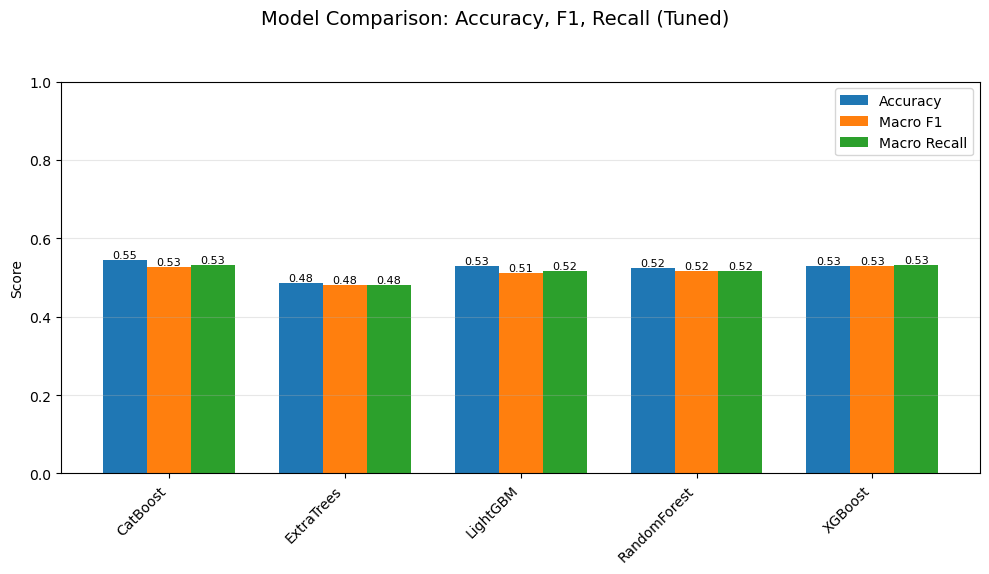

In [2]:
# StepX_model_comparison_f1_acc_recall.py

import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML_Final_Project"
PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")

# Load results from Step5
results_file = os.path.join(PROCESSED_PATH, "baseline_vs_tuned_step5.csv")
df = pd.read_csv(results_file)

# ---------------------------
# Prepare comparison dataframe
# ---------------------------
metrics = ["Accuracy_Tuned", "Macro_F1_Tuned", "Macro_Recall_Tuned"]

# Ensure "Model" column exists
if "Model" not in df.columns:
    df["Model"] = df.index

df_metrics = df[["Model"] + metrics].copy()
df_metrics.set_index("Model", inplace=True)

print("Model Comparison (Accuracy, F1, Recall - Tuned):")
print(df_metrics.round(3))

# ---------------------------
# Plot grouped bar chart
# ---------------------------
labels = df_metrics.index.tolist()
x = range(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Model Comparison: Accuracy, F1, Recall (Tuned)", fontsize=14)

bars_acc = ax.bar([i - width for i in x], df_metrics["Accuracy_Tuned"], width,
                  label="Accuracy", color="#1f77b4")
bars_f1 = ax.bar(x, df_metrics["Macro_F1_Tuned"], width,
                 label="Macro F1", color="#ff7f0e")
bars_rec = ax.bar([i + width for i in x], df_metrics["Macro_Recall_Tuned"], width,
                  label="Macro Recall", color="#2ca02c")

# Add labels on bars
def add_labels(ax, bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

add_labels(ax, bars_acc)
add_labels(ax, bars_f1)
add_labels(ax, bars_rec)

ax.set_xticks(list(x))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim(0, 1.0)   # fixed 0–1
ax.set_ylabel("Score")
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


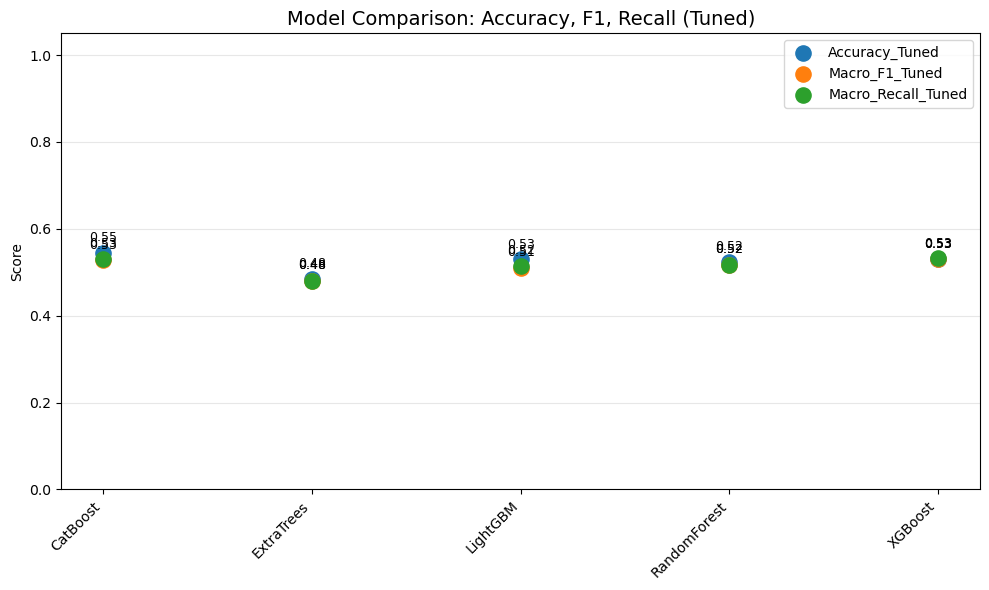

In [3]:
import matplotlib.pyplot as plt

metrics = ["Accuracy_Tuned", "Macro_F1_Tuned", "Macro_Recall_Tuned"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
for i, metric in enumerate(metrics):
    ax.scatter(df_metrics.index, df_metrics[metric], label=metric, s=120, color=colors[i])

# Add value labels on top of points
for i, metric in enumerate(metrics):
    for x_val, y_val in zip(df_metrics.index, df_metrics[metric]):
        ax.text(x_val, y_val + 0.02, f"{y_val:.2f}", ha='center', va='bottom', fontsize=9)

# Axes and title
ax.set_ylabel("Score")
ax.set_ylim(0, 1.05)
ax.set_title("Model Comparison: Accuracy, F1, Recall (Tuned)", fontsize=14)
ax.legend()
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


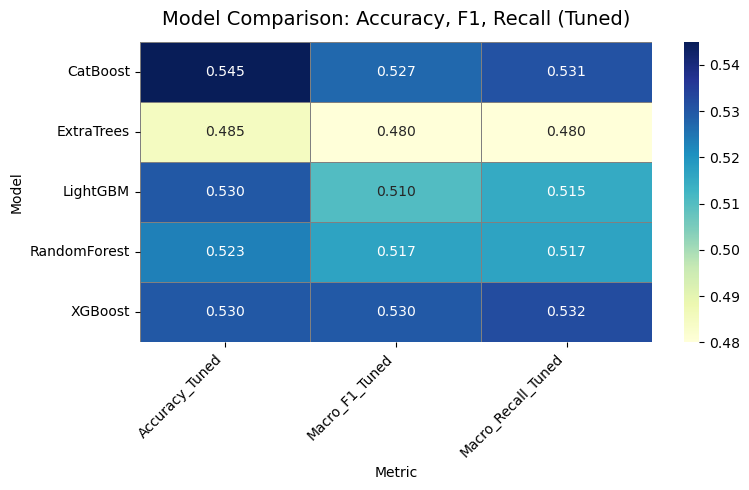

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # slightly wider for readability

# Heatmap
sns.heatmap(
    df_metrics,
    annot=True,       # show values
    fmt=".3f",        # 3 decimal points
    cmap="YlGnBu",    # color map
    cbar=True,
    linewidths=0.5,   # subtle grid lines
    linecolor='gray',
    annot_kws={"size":10}  # font size for annotations
)

plt.title("Model Comparison: Accuracy, F1, Recall (Tuned)", fontsize=14, pad=12)
plt.ylabel("Model")
plt.xlabel("Metric")
plt.yticks(rotation=0)  # keep model names horizontal
plt.xticks(rotation=45, ha='right')  # metrics tilted for readability
plt.tight_layout()
plt.show()


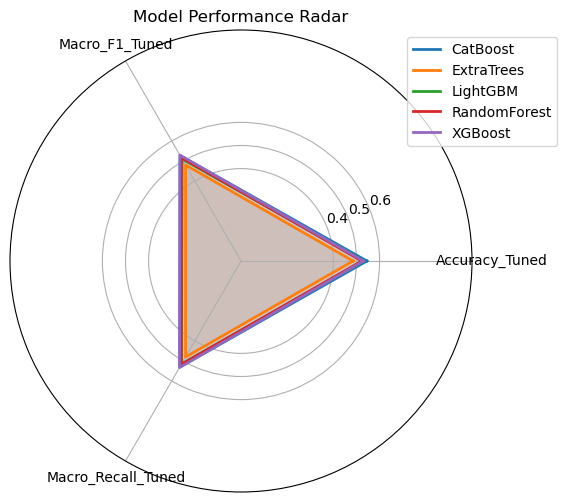

In [4]:
import matplotlib.pyplot as plt
import numpy as np

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for idx, row in df_metrics.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=idx, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.4,0.5,0.6])
ax.set_ylim(0,1)
plt.title("Model Performance Radar")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0))
plt.show()
